- x = (df.loc[:, (df.columns != 'V1') & (df.columns != 'V2') & (df.columns != 'Class')]).to_numpy(): 독립변수
- df['Class'] = df['Class'].map({'bad':0, 'good':1}): 문자형(object)을 범주형(정수)으로 변환
- y = df['Class'].to_numpy(): 종속변수(이온층의 상태)
- trainx, testx, trainy, testy = train_test_split(x, y, random_state=55): (훈련, 테스트) 데이터 랜덤 추출(기본값: 테스트 데이터 25%)
- scaler = StandardScaler(): 데이터 전처리(표준화)
- model = LogisticRegression(C=20, max_iter=1000): 로지스틱 회귀모형(C=20: 규제값, max_iter: 최대 반복 횟수)
- results = model.fit(trainx_scale, trainy): 학습(적합)
- model.score(testx_scale, testy): 테스트용 데이터에 대한 성능(정확도)
- confusion_matrix(testy, ypred): 혼동행렬
- classification_report(testy, ypred): 성능평가 지표
- f1_score(testy, ypred): F1-score
- accuracy_score(testy, ypred): 정확도
- precision_score(testy, ypred): 정밀도
- recall_score(testy, ypred): 재현율
- fpr, tpr, thresholds=roc_curve(testy, ypred): ROC
- auc(fpr, tpr): AUC

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
훈련집합에 대한 분류 성능 (정확도, %): 93.15589353612167
검증집합에 대한 분류 성능 (정확도, %): 75.0
분류 클래스: [0 1]
각 속성별 계수(coefficients)
[[ 8.92072702e-01  3.70075877e-01  1.98830627e+00  7.11637745e-01
   8.29820727e-01  2.85570247e+00  3.13521428e+00 -7.79471652e-01
  -2.05927211e+00 -5.93367053e-02 -1.81714315e+00  1.29420640e+00
   9.95065373e-01 -8.03258379e-01  9.39123350e-01  7.50817070e-01
  -2.04321922e+00  3.73524551e-01  7.18854596e-01 -2.53793989e+00
   2.53428329e+00  1.22476439e+00  9.33226542e-02  2.16219367e+00
  -2.44838244e+00 -3.87202097e-01  1.03897230e+00  1.85704124e-01
   1.29160793e+00  2.36180700e-03 -1.26785717e+00 -1.69296805e+00]]
z 절편값
[0.99810928]
$$$ Confusion Matrix, 혼동행렬 $$$
[[18 16]
 [ 6 48]]
*** 분류 분석 모형 성능평가 지표 ***
              precision    recall  f1-score   support

           0       0.75      0.53      0.62        34
           1       0.75     

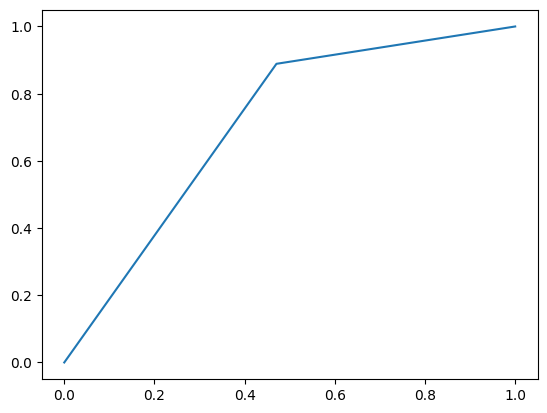

** AUC, Area under ROC Curve, ROC 곡선 아래부분의 면적: 0.7091503267973855


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/work/Ionosphere.csv', index_col=0)
df = data.dropna()
x = (df.loc[:, (df.columns != 'V1') & (df.columns != 'V2') & (df.columns != 'Class')]).to_numpy()
df['Class'] = df['Class'].map({'bad':0, 'good':1})
y = df['Class'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, random_state=55)
scaler = StandardScaler()
scaler.fit(trainx)
trainx_scale = scaler.fit_transform(trainx)
testx_scale = scaler.transform(testx)
model = LogisticRegression(C=20, max_iter=1000)
results = model.fit(trainx_scale, trainy)
ypred = results.predict(testx_scale)
print('훈련집합에 대한 분류 성능 (정확도, %): ', end=''); print(model.score(trainx_scale, trainy)*100)
print('검증집합에 대한 분류 성능 (정확도, %): ', end=''); print(model.score(testx_scale, testy)*100)
print('분류 클래스: ', end=''); print(model.classes_)
print('각 속성별 계수(coefficients)'); print(model.coef_)
print('z 절편값'); print(model.intercept_)
print('$$$ Confusion Matrix, 혼동행렬 $$$')
conf = confusion_matrix(testy, ypred); print(conf)
print('*** 분류 분석 모형 성능평가 지표 ***'); print(classification_report(testy, ypred))
print('*** F1-score 계산 모듈 이용 ***'); print('F1-score: ', end=''); print(f1_score(testy, ypred))
print('*** Accuracy 계산 모듈 이용 ***'); print('Accuracy: ', end=''); print(accuracy_score(testy, ypred))
print('*** Precision 계산 모듈 이용 ***'); print('Precision: ', end=''); print(precision_score(testy, ypred))
print('*** Recall 계산 모듈 이용 ***'); print('Recall: ', end=''); print(recall_score(testy, ypred))
print('^^^ ROC Curve ^^^')
fpr, tpr, thresholds=roc_curve(testy, ypred)
plt.plot(fpr, tpr); plt.show()
print('** AUC, Area under ROC Curve, ROC 곡선 아래부분의 면적: ', end=''); print(auc(fpr, tpr))

- x=(df.loc[:, (df.columns != 'V1') & (df.columns != 'V2') & (df.columns != 'Class')]).to_numpy(): 독립변수
- df['Class']=df['Class'].map({'bad':0, 'good':1}): 문자형 범주형 변환
- y=df['Class'].to_numpy(): 종속변수
- trainx, testx, trainy, testy = train_test_split(x, y, random_state=55): (훈련,테스트) 데이터 랜덤 추출(테스트용=25%)
- scaler = StandardScaler(): 데이터 전처리(표준화)
- model = SVC(kernel='rbf', C=10, gamma=0.1, random_state=42): SVM
- results = model.fit(trainx_scale, trainy): 모형 훈련
- ypred = results.predict(testx_scale): 테스트용 데이터 예측
- model.score(testx_scale, testy): 테스트용 데이터에 대한 성능(정확도)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
훈련집합에 대한 분류 성능 (정확도, %): 100.0
검증집합에 대한 분류 성능 (정확도, %): 93.18181818181817
SVM 모형의 성능(정확도): 0.9318181818181818
$$$ Confusion Matrix, 혼동행렬 $$$
[[31  3]
 [ 3 51]]
*** 분류 분석 모형 성능평가 지표 ***
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        34
           1       0.94      0.94      0.94        54

    accuracy                           0.93        88
   macro avg       0.93      0.93      0.93        88
weighted avg       0.93      0.93      0.93        88

F1-score: 0.9444444444444444
Accuracy (정확도): 0.9318181818181818
Precision (정밀도): 0.9444444444444444
Recall (재현율): 0.9444444444444444
^^^ ROC Curve ^^^


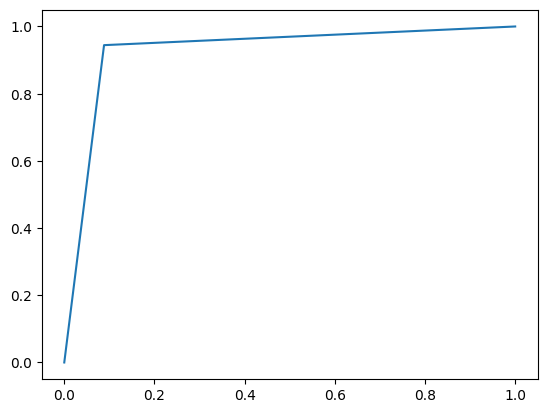

AUC, Area under ROC Curve, ROC 곡선 아래부분의 면적: 0.9281045751633986


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.svm import SVC
data = pd.read_csv('/content/drive/MyDrive/work/Ionosphere.csv', index_col=0)
df = data.dropna()
x = (df.loc[:, (df.columns != 'V1') & (df.columns != 'V2') & (df.columns != 'Class')]).to_numpy()
df['Class'] = df['Class'].map({'bad':0, 'good':1})
y = df['Class'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, random_state=55)
scaler = StandardScaler()
scaler.fit(trainx)
trainx_scale = scaler.fit_transform(trainx)
testx_scale = scaler.transform(testx)
model = SVC(kernel='rbf', C=10, gamma=0.1, random_state=42)
results = model.fit(trainx_scale, trainy)
ypred = results.predict(testx_scale)
print('훈련집합에 대한 분류 성능 (정확도, %): ', end=''); print(model.score(trainx_scale, trainy)*100)
print('검증집합에 대한 분류 성능 (정확도, %): ', end=''); print(model.score(testx_scale, testy)*100)
accuracy = accuracy_score(testy, ypred)
print('SVM 모형의 성능(정확도): ', end=''); print(accuracy)
print('$$$ Confusion Matrix, 혼동행렬 $$$'); conf=confusion_matrix(testy, ypred); print(conf)
print('*** 분류 분석 모형 성능평가 지표 ***'); print(classification_report(testy, ypred))
print('F1-score: ', end=''); print(f1_score(testy, ypred))
print('Accuracy (정확도): ', end=''); print(accuracy_score(testy, ypred))
print('Precision (정밀도): ', end=''); print(precision_score(testy, ypred))
print('Recall (재현율): ', end=''); print(recall_score(testy, ypred))
print('^^^ ROC Curve ^^^')
fpr, tpr, thresholds=roc_curve(testy, ypred)
plt.plot(fpr, tpr); plt.show()
print('AUC, Area under ROC Curve, ROC 곡선 아래부분의 면적: ', end=''); print(auc(fpr, tpr))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
data = pd.read_csv('/content/drive/MyDrive/work/Ionosphere.csv', index_col=0)
df = data.dropna()
x = (df.loc[:, (df.columns != 'V1') & (df.columns != 'V2') & (df.columns != 'Class')]).to_numpy()
df['Class'] = df['Class'].map({'bad':0, 'good':1})
y = df['Class'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, random_state=55)
scaler = StandardScaler()
scaler.fit(trainx)
trainx_scale = scaler.fit_transform(trainx)
testx_scale = scaler.transform(testx)
model = SVC()
param_grid = {
    'kernel': ['poly', 'linear', 'sigmoid'],
    'C' : [0.1, 1, 10, 100],
    'gamma' : [0.1, 0.01, 0.001],
}
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(trainx_scale, trainy)
print('가장 성능이 우수한 파라미터 값(cost, gamma): ', end=''); print(grid_search.best_params_)
bestmodel = grid_search.best_estimator_
accuracy = bestmodel.score(testx_scale, testy)
print('SVM 모형의 성능(정확도): ', end=''); print(accuracy)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
가장 성능이 우수한 파라미터 값(cost, gamma): {'C': 10, 'gamma': 0.001, 'kernel': 'sigmoid'}
SVM 모형의 성능(정확도): 0.8068181818181818


- x=(df.loc[:, (df.columns != 'V1') & (df.columns != 'V2') & (df.columns != 'Class')]).to_numpy(): 독립변수
- y=df['Class'].to_numpy(): 종속변수
- trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55): (훈련용, 테스트용) 랜덤 추출, 테스트용=30%
- scaler = StandardScaler(): 데이터 전처리(표준화)
- model = RandomForestClassifier(n_estimators = 100, random_state=42): 랜덤 포레스트
- model.fit(trainx_scale, trainy): 모형 훈련
- accuracy_score(testy, predictions): 테스트용 데이터에 대한 성능(정확도)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv('/content/drive/MyDrive/work/Ionosphere.csv', index_col=0)
df = data.dropna()
x = (df.loc[:, (df.columns != 'V1') & (df.columns != 'V2') & (df.columns != 'Class')]).to_numpy()
df['Class'] = df['Class'].map({'bad':0, 'good':1})
y = df['Class'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)
scaler = StandardScaler()
scaler.fit(trainx)
trainx_scale = scaler.fit_transform(trainx)
testx_scale = scaler.transform(testx)
model = RandomForestClassifier(n_estimators = 100, random_state=42)
model.fit(trainx_scale, trainy)
predictions = model.predict(testx_scale)
print(predictions[:10])
print('Random Forest(랜덤포레스트) 분류 모형 성능(정확도): ', end=''); print(accuracy_score(testy, predictions))
print('$$$ Confusion Matrix, 혼동행렬 $$$'); conf = confusion_matrix(testy, predictions); print(conf)
print('*** 분류 분석 모형 성능평가 지표 ***'); print(classification_report(testy, predictions))
print('!!! 특성 중요도 !!!'); print(model.feature_importances_)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[0 0 1 1 1 1 1 1 0 1]
Random Forest(랜덤포레스트) 분류 모형 성능(정확도): 0.8962264150943396
$$$ Confusion Matrix, 혼동행렬 $$$
[[28  7]
 [ 4 67]]
*** 분류 분석 모형 성능평가 지표 ***
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        35
           1       0.91      0.94      0.92        71

    accuracy                           0.90       106
   macro avg       0.89      0.87      0.88       106
weighted avg       0.90      0.90      0.89       106

!!! 특성 중요도 !!!
[0.12082669 0.03968546 0.11250866 0.04774898 0.09538261 0.06198568
 0.01499966 0.01778502 0.00826812 0.02801801 0.0100553  0.02930909
 0.01747781 0.01773171 0.01291163 0.0318232  0.01536555 0.01322081
 0.02085878 0.01616311 0.01444753 0.01712973 0.00728965 0.01120415
 0.06296264 0.0233353  0.01565529 0.00992024 0.04045929 0.01355633
 0.03546267 0.0164513 ]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv('/content/drive/MyDrive/work/Ionosphere.csv', index_col=0)
df = data.dropna()
x = (df.loc[:, (df.columns != 'V1') & (df.columns != 'V2') & (df.columns != 'Class')]).to_numpy()
df['Class'] = df['Class'].map({'bad':0, 'good':1})
y = df['Class'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators' : [50, 100, 200],
    'max_depth' : [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
gridresult = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
gridresult.fit(trainx, trainy)
bestparam = gridresult.best_params_
print('Grid 탐색을 통한 최적 파라미터 값: ', end=''); print(bestparam)
bestaccuracy = gridresult.best_score_
print('최적 파라미터 값 적용시 RandomForest 모형의 정확도(훈련데이터세트): ', end=''); print(bestaccuracy)
bestmodel = gridresult.best_estimator_
testaccuracy = bestmodel.score(testx, testy)
print('검증데이터세트 이용한 정확도(최적 파라미터 적용): ', end=''); print(testaccuracy)
predictions = bestmodel.predict(testx)
print(predictions[:10])
print('Random Forest(랜덤포레스트) 분류 모형 성능(정확도): ', end=''); print(accuracy_score(testy, predictions))
print('$$$ Confusion Matrix, 혼동행렬 $$$'); conf = confusion_matrix(testy, predictions); print(conf)
print('*** 분류 분석 모형 성능평가 지표 ***'); print(classification_report(testy, predictions))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Grid 탐색을 통한 최적 파라미터 값: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
최적 파라미터 값 적용시 RandomForest 모형의 정확도(훈련데이터세트): 0.9551020408163264
검증데이터세트 이용한 정확도(최적 파라미터 적용): 0.8962264150943396
[0 0 1 1 1 1 1 1 0 1]
Random Forest(랜덤포레스트) 분류 모형 성능(정확도): 0.8962264150943396
$$$ Confusion Matrix, 혼동행렬 $$$
[[28  7]
 [ 4 67]]
*** 분류 분석 모형 성능평가 지표 ***
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        35
           1       0.91      0.94      0.92        71

    accuracy                           0.90       106
   macro avg       0.89      0.87      0.88       106
weighted avg       0.90      0.90      0.89       106



- x=(df.loc[:, (df.columns != 'V1') & (df.columns != 'V2') & (df.columns != 'Class')]).to_numpy(): 독립변수
- y=df['Class'].to_numpy(): 종속변수
- trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55): (훈련용, 테스트용) 랜덤 추출, 테스트용=30%
- scaler= StandardScaler(): 데이터 전처리(표준화)
- model=DecisionTreeClassifier(max_depth=3, random_state=42): 결정트리
- scores = cross_validate(model, x, y, return_train_score=True): 교차검증
- model.fit(x, y): 모형 훈련
- accuracy_score(y, predictions): 성능(정확도)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
훈련데이터세트에 대한 성능(정확도): 0.9287824097610574
검증데이터세트에 대한 성능(정확도): 0.8775855130784709
[1 0 1 0 1 0 1 0 1 0]
Decision Tree 분류기 (결정트리 알고리즘) 정확도: 0.9259259259259259
$$$ Confusion Matrix, 혼동행렬 $$$
[[114  12]
 [ 14 211]]
*** 분류 분석 모형 성능평가 지표 ***
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       126
           1       0.95      0.94      0.94       225

    accuracy                           0.93       351
   macro avg       0.92      0.92      0.92       351
weighted avg       0.93      0.93      0.93       351

!!! 특성 중요도 !!!
[0.02633968 0.         0.58640439 0.         0.         0.03164322
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.32728788 0.         0.         0.         0.   

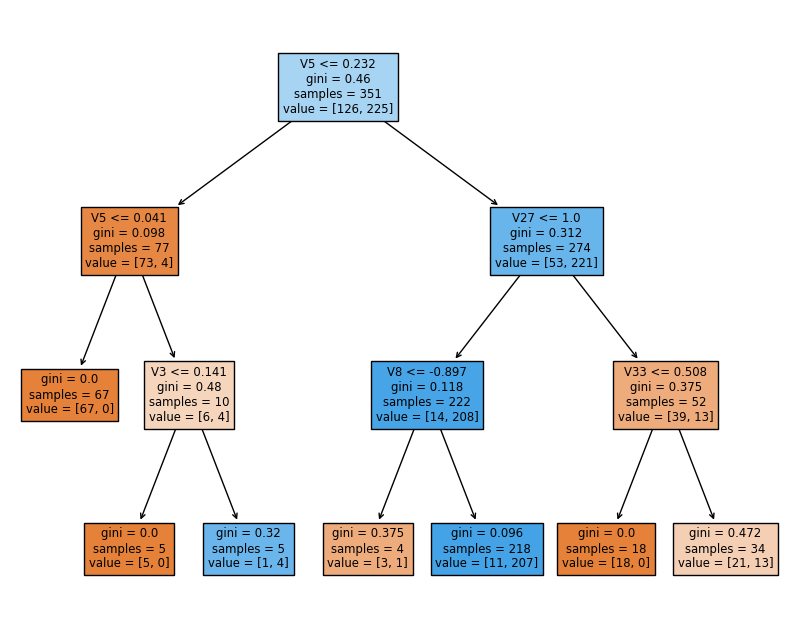

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
data = pd.read_csv('/content/drive/MyDrive/work/Ionosphere.csv', index_col=0)
df = data.dropna()
x = (df.loc[:, (df.columns != 'V1') & (df.columns != 'V2') & (df.columns != 'Class')]).to_numpy()
df['Class'] = df['Class'].map({'bad':0, 'good':1})
y = df['Class'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)
model = DecisionTreeClassifier(max_depth=3, random_state=42)
scores = cross_validate(model, x, y, return_train_score=True)
print('훈련데이터세트에 대한 성능(정확도): ', end=''); print(np.mean(scores['train_score']))
print('검증데이터세트에 대한 성능(정확도): ', end=''); print(np.mean(scores['test_score']))
model.fit(x, y)
predictions = model.predict(x)
print(predictions[:10])
print('Decision Tree 분류기 (결정트리 알고리즘) 정확도: ', end=''); print(accuracy_score(y, predictions))
print('$$$ Confusion Matrix, 혼동행렬 $$$'); conf = confusion_matrix(y, predictions); print(conf)
print('*** 분류 분석 모형 성능평가 지표 ***'); print(classification_report(y, predictions))
print('!!! 특성 중요도 !!!'); print(model.feature_importances_)
plt.figure(figsize=(10, 8))
plot_tree(model, filled=True, feature_names=['V'+str(i) for i in range(3, 35)])
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
*** 분류 분석 모형 성능평가 지표 ***
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.92      0.94      0.93        71

    accuracy                           0.91       106
   macro avg       0.90      0.89      0.89       106
weighted avg       0.90      0.91      0.90       106

F1-Score:0.9305555555555556
Accuracy (정확도):0.9056603773584906
Precision (정밀도):0.9178082191780822
Recall (재현율):0.9436619718309859
^^^ ROC Curve ^^^


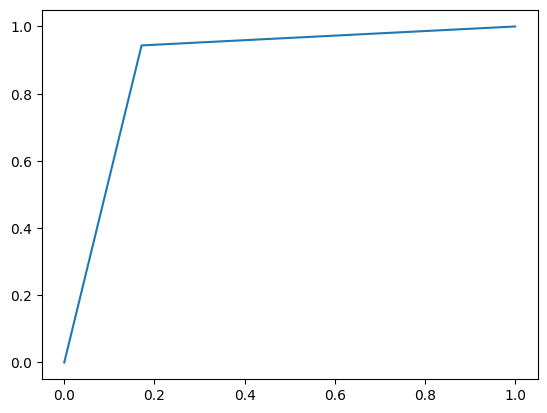

AUC, Area under ROC Curve, ROC 곡선 아래부분의 면적: 0.8861167002012073


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
data = pd.read_csv('/content/drive/MyDrive/work/Ionosphere.csv', index_col=0)
df = data.dropna()
x = (df.loc[:, (df.columns != 'V1') & (df.columns != 'V2') & (df.columns != 'Class')]).to_numpy()
df['Class'] = df['Class'].map({'bad':0, 'good':1})
y = df['Class'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)
model = DecisionTreeClassifier(max_depth=3, random_state=42)
scores = cross_validate(model, x, y, return_train_score=True)
model.fit(x, y)
predictions = model.predict(testx)
print('*** 분류 분석 모형 성능평가 지표 ***')
print(classification_report(testy, predictions))
print('F1-Score:', end=''); print(f1_score(testy, predictions))
print('Accuracy (정확도):', end=''); print(accuracy_score(testy, predictions))
print('Precision (정밀도):', end=''); print(precision_score(testy, predictions))
print('Recall (재현율):', end=''); print(recall_score(testy, predictions))
print('^^^ ROC Curve ^^^')
fpr, tpr, thresholds=roc_curve(testy, predictions)
plt.plot(fpr, tpr); plt.show()
print('AUC, Area under ROC Curve, ROC 곡선 아래부분의 면적: ', end=''); print(auc(fpr, tpr))

- x=df[['Income', 'Illiteracy', 'Life.Exp', 'Murder', 'HS.Grad', 'Frost']]: 독립변수
- y=df['Population']: 종속변수
- fit = ols('y ~ x', data=df).fit() 다중 선형회귀 분석 모형
- df['pred']=fit.fittedvalues: 예측값 저장

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from statsmodels.formula.api import ols
import math
data = pd.read_csv('/content/drive/MyDrive/work/state.csv', header=0, index_col=0)
df = data.copy()
x = df[['Income', 'Illiteracy', 'Life.Exp', 'Murder', 'HS.Grad', 'Frost']]
y = df['Population']
fit = ols('y ~ x', data=df).fit()
df['pred'] = fit.fittedvalues; print(df.head())
me = (df['Population'] - df['pred']).mean()
print('평균 예측 오차(Mean of Squared Errors)/ME: ', end=''); print(me)
mse = ((df['Population']-df['pred'])*(df['Population']-df['pred'])).mean()
print('평균 제곱 오차(Mean of Squared Errors)/MSE: ', end=''); print(mse)
rmse = math.sqrt(mse)
print('표준 오차(Root Mean Squared Errors)/RMSE: ', end=''); print(rmse)
mae = (abs(df['Population']-df['pred'])).mean()
print('평균 절대 오차(Mean Absolute Errors)/MAE: ', end=''); print(mae)
mpe = ((df['Population']-df['pred'])/df['Population']).mean()
print('평균 백분오차 비율(Mean Percentage Errors)/MPE: ', end=''); print(mpe)
mape = (abs((df['Population']-df['pred'])/df['Population'])).mean()
print('평균 절대 백분오차 비율(Mean Absolute Percentage Errors)/MAPE: ', end=''); print(mape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
            Population  Income  Illiteracy  Life.Exp  Murder  HS.Grad  Frost  \
Alabama           3615    3624         2.1     69.05    15.1     41.3     20   
Alaska             365    6315         1.5     69.31    11.3     66.7    152   
Arizona           2212    4530         1.8     70.55     7.8     58.1     15   
Arkansas          2110    3378         1.9     70.66    10.1     39.9     65   
California       21198    5114         1.1     71.71    10.3     62.6     20   

              Area         pred  
Alabama      50708  7992.553068  
Alaska      566432  4864.493230  
Arizona     113417  3458.846347  
Arkansas     51945  5076.803429  
California  156361  9918.772168  
평균 예측 오차(Mean of Squared Errors)/ME: -3.154127625748515e-11
평균 제곱 오차(Mean of Squared Errors)/MSE: 12157532.511458404
표준 오차(Root Mean Squared Errors)/RMSE: 3486.7653364484404
평균 절대 오차(Mea

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     4.348
Date:                Sat, 15 Jun 2024   Prob (F-statistic):            0.00163
Time:                        11:32:53   Log-Likelihood:                -478.78
No. Observations:                  50   AIC:                             971.6
Df Residuals:                      43   BIC:                             985.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--

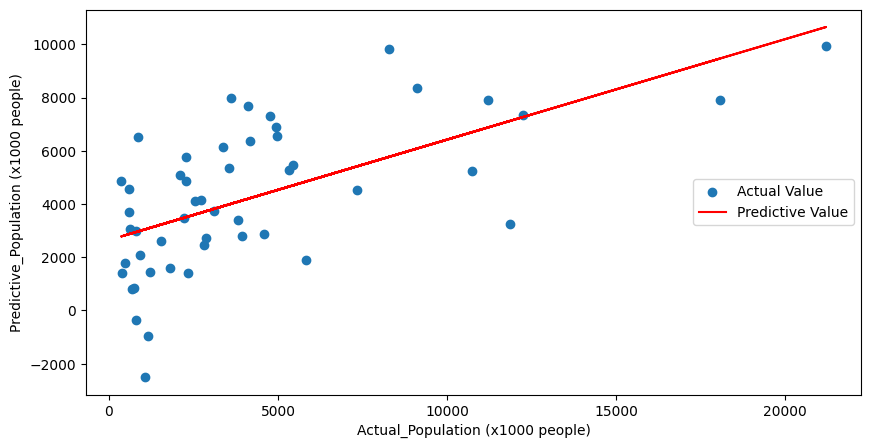

In [8]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import math
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/content/drive/MyDrive/work/state.csv', header=0, index_col=0)
df = data.copy()
x = df[['Income', 'Illiteracy', 'Life.Exp', 'Murder', 'HS.Grad', 'Frost']]
y = df['Population']
fit = ols('y ~ x', data=df).fit()
print(fit.summary())
df['pred'] = fit.fittedvalues
print('$$$ 잔차값, Residuals 첫5행')
print(fit.resid[:5])
print('잔차값의 평균:', end=''); print(fit.resid.mean())
print('%%% 새로운 독립변수(x)에 인구(천명) 예측값:', end='')
print(fit.predict(exog=dict(x=[[3500, 1.5, 80, 10, 50, 100]])))
print('Colorado 지역의 인구(천명) 실제값: ', end=''); print(data.iloc[5,0])
print('Colorado 지역의 인구(천명) 예측값: ', end=''); print(fit.predict(exog=dict(data.iloc[5, 1:6]))[5])
print('Colorado 지역의 인구(천명) 예측값(계수, y절편 이용): ', end='');
gap = fit.params.Intercept+data.iloc[5, 1]*fit.params[1]+data.iloc[5, 2]*fit.params[2]+data.iloc[5,3]*fit.params[3] \
+data.iloc[5,4]*fit.params[4]+data.iloc[5,5]*fit.params[5]
print(gap)
relative_error = (data.iloc[5, 0]-fit.predict(exog=dict(data.iloc[5, 1:6]))[5])/data.iloc[5,0]*100
print('실제값과 예측값 사이의 상대오차_절대값(%): ', end=''); print(abs(relative_error))
model = LinearRegression()
model.fit(df[['Population']], df['pred'])
y_fit = model.predict(df['Population'].to_numpy().reshape(-1, 1))
plt.figure(figsize=(10, 5))
plt.scatter(y, df['pred'])
plt.plot(y, y_fit, color='red')
plt.xlabel('Actual_Population (x1000 people)')
plt.ylabel('Predictive_Population (x1000 people)')
plt.legend(('Actual Value', 'Predictive Value'), loc='center right'); plt.show()

- x=df[['Income', 'Illiteracy', 'Life.Exp', 'Murder', 'HS.Grad', 'Frost']]: 독립변수
- y = df['Population']: 종속변수
- model = DecisionTreeRegressor(max_depth=2, random_state=55): 의사결정나무 모형
- results = model.fit(trainx, trainy): 훈련 데이터 학습
- ypred = model.predict(testx): 검증 데이터에 대한 예측

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0.5527248348911427
[ 4571.70588235  2261.2         2261.2          755.625
  2261.2          755.625       2261.2        10719.6
   755.625      10719.6       ]
평균 제곱 오차(Mean Squared Error): 37257031.753
평균 절대 오차(Mean Absolute Error): 3329.6508
의사결정나무 분석모형 성능(정확도(%), 훈련 데이터세트): 55.272483489114265
의사결정나무 분석모형 성능(정확도(%), 검증 데이터세트): -46.173053212250046
특성 중요도: [0.         0.         0.         0.02123178 0.97876822 0.        ]


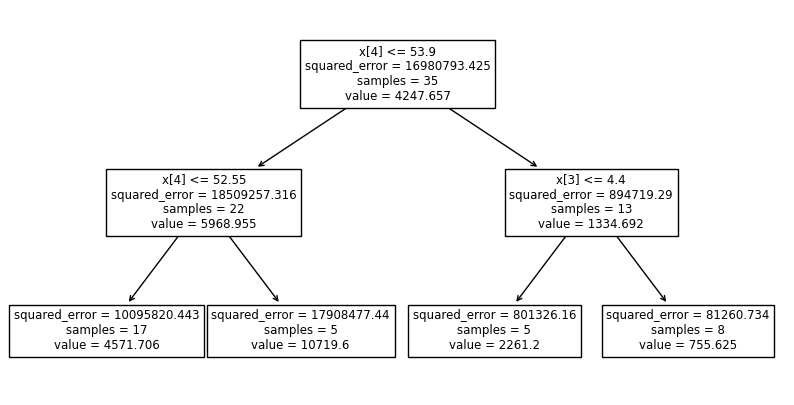

In [9]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import plot_tree
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/work/state.csv', header=0, index_col=0)
df = data.copy()
x = df[['Income', 'Illiteracy', 'Life.Exp', 'Murder', 'HS.Grad', 'Frost']]
y = df['Population']
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)
model = DecisionTreeRegressor(max_depth=2, random_state=55)
results = model.fit(trainx, trainy)
print(model.score(trainx, trainy))
ypred = model.predict(testx); print(ypred[:10])
mse = mean_squared_error(testy, ypred)
print('평균 제곱 오차(Mean Squared Error): ', end=''); print(round(mse, 4))
mae = mean_absolute_error(testy, ypred)
print('평균 절대 오차(Mean Absolute Error): ', end=''); print(round(mae, 4))
print('의사결정나무 분석모형 성능(정확도(%), 훈련 데이터세트): ', end=''); print(100*model.score(trainx, trainy))
print('의사결정나무 분석모형 성능(정확도(%), 검증 데이터세트): ', end=''); print('', end=''); print(100*model.score(testx, testy))
print('특성 중요도: ', end=''); print(model.feature_importances_)
plt.figure(figsize=(10, 5))
plot_tree(model); plt.show()

- df['species'] = pd.DataFrame(data=iris['target'], columns=['target']): 붓꽃 품종 데이터 추출
- df['species'].replace([0,1,2], iris['target_names'], inplace=True): 속성 이름
- df1=df[df['species'] == 'setosa']: setosa 품종 추출
- df2=df[df['species'] == 'versicolor']: versicolor 품종 추출
- t,pvalue = stats.ttest_ind(df1['petal length (cm)'], df2['petal length (cm)'], equal_var=False): t-검정통계량, 유의확률(pvalue)

In [10]:
from sklearn.datasets import load_iris
import pandas as pd
from scipy import stats
import numpy as np
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.DataFrame(data=iris.target, columns=['target'])
df['species'].replace([0,1,2], iris.target_names, inplace=True)
print('species="setosa"인 petal length 길이(cm): ', end=''); print(np.mean(df[df['species'] == 'setosa']["petal length (cm)"]))
print('species="versicolor"인 petal length 길이(cm): ', end=''); print(np.mean(df[df['species'] == 'versicolor']["petal length (cm)"]))
df1 = df[df['species'] == 'setosa']
df2 = df[df['species'] == 'versicolor']
print(df1['petal length (cm)'].describe())
print(df2['petal length (cm)'].describe())
t, pvalue = stats.ttest_ind(df1['petal length (cm)'], df2['petal length (cm)'], equal_var=False)
print('t-검정통계량: ', end=''); print(t)
print('유의확률: ', end=''); print(pvalue)
alpha = 0.05
if pvalue < alpha:
  print("(setosa, versicolor)별 (petal length (cm))의 차이가 유의미하게 존재합니다. (귀무가설 기각)")
else:
  print("(setosa, versicolor)별 (petal length (cm))의 차이가 유의미하지 않습니다. (귀무가설 채택)")

species="setosa"인 petal length 길이(cm): 1.4620000000000002
species="versicolor"인 petal length 길이(cm): 4.26
count    50.000000
mean      1.462000
std       0.173664
min       1.000000
25%       1.400000
50%       1.500000
75%       1.575000
max       1.900000
Name: petal length (cm), dtype: float64
count    50.000000
mean      4.260000
std       0.469911
min       3.000000
25%       4.000000
50%       4.350000
75%       4.600000
max       5.100000
Name: petal length (cm), dtype: float64
t-검정통계량: -39.492719391538095
유의확률: 9.934432957587695e-46
(setosa, versicolor)별 (petal length (cm))의 차이가 유의미하게 존재합니다. (귀무가설 기각)


- df['species'] = pd.DataFrame(data=iris['target'], columns=['target']): 붓꽃 품종 데이터 추출
- df['species'].replace([0,1,2], iris['target_names'], inplace=True): 속성 이름
- t, pvalue = stats.ttest_ind(df[df['species']=='setosa']['petal width (cm)'], df[df['species']=='setosa']['sepal width (cm)'], equal_var = False): t-검정

In [12]:
from sklearn.datasets import load_iris
import pandas as pd
from scipy import stats
import numpy as np
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.DataFrame(data=iris.target, columns=['target'])
df['species'].replace([0,1,2], iris.target_names, inplace=True)
print('species="setosa"인 petal width 평균 길이(cm): ', end=''); print(np.mean(df[df['species'] == 'setosa']["petal width (cm)"]))
print('species="versicolor"인 petal width 평균 길이(cm): ', end=''); print(np.mean(df[df['species'] == 'versicolor']["petal width (cm)"]))
print(df1['petal width (cm)'].describe())
print(df2['petal width (cm)'].describe())
t, pvalue = stats.ttest_ind(df[df['species']=='setosa']['petal width (cm)'], df[df['species']=='setosa']['sepal width (cm)'], equal_var=False)
print('t-검정통계량: ', end=''); print(t)
print('유의확률: ', end=''); print(pvalue)
alpha = 0.05
if pvalue < alpha:
  print("(setosa, versicolor)별 (petal width (cm))의 차이가 유의미하게 존재합니다. (귀무가설 기각)")
else:
  print("(setosa, versicolor)별 (petal width (cm))의 차이가 유의미하지 않습니다. (귀무가설 채택)")

species="setosa"인 petal width 평균 길이(cm): 0.24599999999999997
species="versicolor"인 petal width 평균 길이(cm): 1.3259999999999998
count    50.000000
mean      0.246000
std       0.105386
min       0.100000
25%       0.200000
50%       0.200000
75%       0.300000
max       0.600000
Name: petal width (cm), dtype: float64
count    50.000000
mean      1.326000
std       0.197753
min       1.000000
25%       1.200000
50%       1.300000
75%       1.500000
max       1.800000
Name: petal width (cm), dtype: float64
t-검정통계량: -57.18806800331009
유의확률: 1.0116303263334372e-51
(setosa, versicolor)별 (petal width (cm))의 차이가 유의미하게 존재합니다. (귀무가설 기각)


- df1 = df[df['주거지역'] == '소도시']: 주거지역=소도시 데이터 추출
- df2 = df[df['주거지역'] == '중도시']: 주거지역=중도시 데이터 추출
- x1 = len(df1[df1['쿠폰선호도']=='예']): 소도시 지역에서 쿠폰선호도=예인 사람의 수
- x2 = len(df2[df2['쿠폰선호도']=='예']): 중도시 지역에서 쿠폰선호도=예인 사람의 수
- observed = [[[x1,x2],[len(df1)-x1, len(df2)-x2]]]: 입력 데이터 구성
- chi, pvalue, dof, expect = stats.chi2_contingency(observed): 카이제곱 검정

In [13]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from scipy import stats
df = pd.read_csv('/content/drive/MyDrive/work/data.csv', encoding='euc-kr')
df1 = df[df['주거지역'] == '소도시']
df2 = df[df['주거지역'] == '중도시']
print('주거지역=소도시인 사람의 수(명): ', end=''); print(len(df1))
print('주거지역=중도시인 사람의 수(명): ', end=''); print(len(df2))
x1 = len(df1[df1['쿠폰선호도']=='예'])
x2 = len(df2[df2['쿠폰선호도']=='예'])
print('"소도시" 거주민 중 쿠폰선호도="예"인 사람의 수: ', end=''); print(x1)
print('"중도시" 거주민 중 쿠폰선호도="예"인 사람의 수: ', end=''); print(x2)
print('쿠폰선호도="예"인 소도시 거주민 비율: ', end=''); print(x1/len(df1))
print('쿠폰선호도="예"인 중도시 거주민 비율: ', end=''); print(x2/len(df2))
observed = [[[x1,x2],[len(df1)-x1, len(df2)-x2]]]
print(observed)
chi, pvalue, dof, expect = stats.chi2_contingency(observed)
print('카이제곱 검정: ', end=''); print(round(chi, 3))
print('유의확률: ', end=''); print(round(pvalue, 4))
print('기대 빈도수: '); print(expect)
alpha = 0.05
if pvalue < alpha:
  print("(소도시, 중도시)에 대한 쿠폰선호도='예'의 비율의 차이가 유의미하게 존재합니다. (귀무가설 기각)")
else:
  print("(소도시, 중도시)에 대한 쿠폰선호도='예'의 비율의 차이가 유의미하지 않습니다. (귀무가설 채택)")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
주거지역=소도시인 사람의 수(명): 30
주거지역=중도시인 사람의 수(명): 24
"소도시" 거주민 중 쿠폰선호도="예"인 사람의 수: 20
"중도시" 거주민 중 쿠폰선호도="예"인 사람의 수: 12
쿠폰선호도="예"인 소도시 거주민 비율: 0.6666666666666666
쿠폰선호도="예"인 중도시 거주민 비율: 0.5
[[[20, 12], [10, 12]]]
카이제곱 검정: 0.921
유의확률: 0.3371
기대 빈도수: 
[[[17.77777778 14.22222222]
  [12.22222222  9.77777778]]]
(소도시, 중도시)에 대한 쿠폰선호도='예'의 비율의 차이가 유의미하지 않습니다. (귀무가설 채택)


- df1 = df[df['주거지역']=='소도시']: 주거지역=소도시 데이터 추출
- df2 = df[df['주거지역']=='대도시']: 주거지역=대도시 데이터 추출
- x1 = len(df1[df1['쿠폰선호도']=='예']): 소도시 지역에서 쿠폰선호도=예인 사람의 수
- x2 = len(df2[df2['쿠폰선호도']=='예']): 대도시 지역에서 쿠폰선호도=예인 사람의 수
- observed=[[[x1, x2],[len(df1)-x1, len(df2)-x2]]]: 입력 데이터 구성
- chi, pvalue, dof, expect = stats.chi2_contingency(observed): 카이제곱 검정


In [14]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from scipy import stats
df = pd.read_csv('/content/drive/MyDrive/work/data.csv', encoding='euc-kr')
df1 = df[df['주거지역']=='소도시']
df2 = df[df['주거지역']=='대도시']
print('주거지역=소도시인 사람의 수(명): ', end=''); print(len(df1))
print('주거지역=대도시인 사람의 수(명): ', end=''); print(len(df2))
x1 = len(df1[df1['쿠폰선호도']=='예'])
x2 = len(df2[df2['쿠폰선호도']=='예'])
print('"소도시" 거주민 중 쿠폰선호도="예"인 사람의 수: ', end=''); print(x1)
print('"대도시" 거주민 중 쿠폰선호도="예"인 사람의 수: ', end=''); print(x2)
print('쿠폰선호도="예"인 소도시 거주민 비율: ', end=''); print(x1/len(df1))
print('쿠폰선호도="예"인 대도시 거주민 비율: ', end=''); print(x2/len(df2))
observed = [[[x1,x2],[len(df1)-x1, len(df2)-x2]]]
print(observed)
chi, pvalue, dof, expect = stats.chi2_contingency(observed)
print('카이제곱 검정: ', end=''); print(round(chi, 3))
print('유의확률: ', end=''); print(round(pvalue, 4))
print('기대 빈도수: '); print(expect)
alpha = 0.05
if pvalue < alpha:
  print("(소도시, 대도시)에 대한 쿠폰선호도='예'의 비율의 차이가 유의미하게 존재합니다. (귀무가설 기각)")
else:
  print("(소도시, 대도시)에 대한 쿠폰선호도='예'의 비율의 차이가 유의미하지 않습니다. (귀무가설 채택)")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
주거지역=소도시인 사람의 수(명): 30
주거지역=대도시인 사람의 수(명): 36
"소도시" 거주민 중 쿠폰선호도="예"인 사람의 수: 20
"대도시" 거주민 중 쿠폰선호도="예"인 사람의 수: 16
쿠폰선호도="예"인 소도시 거주민 비율: 0.6666666666666666
쿠폰선호도="예"인 대도시 거주민 비율: 0.4444444444444444
[[[20, 16], [10, 20]]]
카이제곱 검정: 2.425
유의확률: 0.1194
기대 빈도수: 
[[[16.36363636 19.63636364]
  [13.63636364 16.36363636]]]
(소도시, 대도시)에 대한 쿠폰선호도='예'의 비율의 차이가 유의미하지 않습니다. (귀무가설 채택)


- df1=df[df['주거지역'] == '소도시'].이용만족도 : 소도시 지역 이용만족도
- df2=df[df['주거지역']== '중도시'].이용만족도 : 중도시 지역 이용만족도
- df3=df[df['주거지역']==' 대도시'].이용만족도 : 대도시 지역 이용만족도
- group1 = df1.to_numpy(); group2 =df2.to_numpy(); group3 = df3.to_numpy(): 넘파이 배열구조로 변환
- n1 = len(group1); n2=len(group2);n3=len(group3):데이터 행의 개수
- avg1 = np.mean(group1); avg2 = np.mean(group2); avg3 = np.mean(group3): 이용만족도 평균
- var1 = np.var(group1, ddof=1); var2 = np.var(group2, ddof=1); var3 = np.var(group3, ddof=1): 이용만족도 분산
- Fstatistics, pvalue = stats.f_oneway(group1, group2, group3): 일원배치 분산분석

In [17]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from scipy import stats
df = pd.read_csv('/content/drive/MyDrive/work/data.csv', encoding='euc-kr')
df1 = df[df['주거지역'] == '소도시'].이용만족도
df2 = df[df['주거지역'] == '중도시'].이용만족도
df3 = df[df['주거지역'] == '대도시'].이용만족도
print(' 그룹(주거지역)별 기술통계량 ')
print(df1.describe()); print(df2.describe()); print(df3.describe())
group1 = df1.to_numpy(); group2 = df2.to_numpy(); group3 = df3.to_numpy()
print('그룹별 데이터 개수')
n1 = len(group1); n2 = len(group2); n3 = len(group3)
print(n1);print(n2);print(n3)
print('그룹별 이용만족도 평균')
avg1 = np.mean(group1); avg2 = np.mean(group2); avg3 = np.mean(group3)
print(avg1);print(avg2);print(avg3)
print('그룹별 이용만족도 분산')
var1 = np.var(group1, ddof=1); var2 = np.var(group2, ddof=1); var3 = np.var(group3, ddof=1)
print(var1);print(var2);print(var3)
Fstatistics, pvalue = stats.f_oneway(group1, group2, group3)
print('F-통계량 값: ', end=''); print(Fstatistics)
print('pvalue(유의확률): ', end=''); print(pvalue)
alpha=0.05
if pvalue < alpha:
  print('귀무가설 기각: 그룹(주거지역)간 이용만족도 (분산)차이가 다를 가능성이 있다.')
else:
  print('귀무가설 채택: 그룹(주거지역)간 이용만족도 (분산)차이가 다를 가능성이 낮다.')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 그룹(주거지역)별 기술통계량 
count    30.000000
mean      5.266667
std       1.229896
min       3.000000
25%       4.000000
50%       5.000000
75%       6.000000
max       7.000000
Name: 이용만족도, dtype: float64
count    24.000000
mean      4.791667
std       1.413573
min       1.000000
25%       4.000000
50%       5.000000
75%       5.250000
max       7.000000
Name: 이용만족도, dtype: float64
count    36.000000
mean      5.583333
std       1.518928
min       2.000000
25%       5.000000
50%       6.000000
75%       7.000000
max       7.000000
Name: 이용만족도, dtype: float64
그룹별 데이터 개수
30
24
36
그룹별 이용만족도 평균
5.266666666666667
4.791666666666667
5.583333333333333
그룹별 이용만족도 분산
1.5126436781609196
1.9981884057971016
2.307142857142857
F-통계량 값: 2.3015535688113733
pvalue(유의확률): 0.10616798419154042
귀무가설 채택: 그룹(주거지역)간 이용만족도 (분산)차이가 다를 가능성이 낮다.


- dfnew = df[['품질', '가격', '서비스', '배송']]: 분석 항목 데이터 추출
- dfnew['s1']=1; dfnew['s2']=2; dfnew['s3']=3; dfnew['s4']=4: 만족도 유형 분류
- d1 = dfnew[['품질','s1']].to_numpy(): (품질 이용만족도, 1) 데이터프레임 작성
- d2 = dfnew[['가격', 's2']].to_numpy(): (가격 이용만족도, 2) 데이터프레임 작성
- d3 = dfnew[['서비스', 's3']].to_numpy(): (서비스 이용만족도, 3) 데이터프레임 작성
- d4 = dfnew[['배송', 's4']].to_numpy(): (배송 이용만족도, 4) 데이터프레임 작성
- dtotal = pd.DataFrame(np.concatenate((d1,d2,d3,d4), axis=0), columns=['value','group']): (항목별 이용만족도, 만족도 유형)=(value, group) 데이터프레임 작성
- model =ols('value ~ C(group)', data=dtotal).fit(): 다원배치 분산분석(반복측정)
- anova_table = sm.stats.anova_lm(model, typ=2): 분산분석표(ANOVA)
- anova_table.loc['C(group)']['F']:F-검정통계량
- anova_table.loc['C(group)']['PR(>F)']: 유의확률

In [18]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from scipy import stats
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/drive/MyDrive/work/data.csv', encoding='euc-kr', index_col=0)
dfnew = df[['품질', '가격', '서비스', '배송']]
dfnew['s1'] = 1; dfnew['s2'] = 2; dfnew['s3'] = 3; dfnew['s4'] = 4;
d1 = dfnew[['품질', 's1']].to_numpy(); d2 = dfnew[['가격', 's2']].to_numpy();
d3 = dfnew[['서비스', 's3']].to_numpy(); d4 = dfnew[['배송', 's4']].to_numpy();
dtotal = pd.DataFrame(np.concatenate((d1, d2, d3, d4), axis=0), columns=['value', 'group'])
print(dtotal.head())
model = ols('value ~ C(group)', data=dtotal).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA 분석 결과 '); print(anova_table)
print('--------------------')
print('ANOVA 분석 F-통계량 값: ', end=''); print(anova_table.loc['C(group)']['F'])
print('ANOVA 분석 p-value: ', end=''); print(anova_table.loc['C(group)']['PR(>F)'])
alpha = 0.05
if anova_table.loc['C(group)']['PR(>F)'] < alpha:
  print('귀무가설 기각: 고객별로 그룹(유형별 만족도 점수)차이가 다를 가능성이 있다.')
else:
  print('귀무가설 채택: 고객별로 그룹(유형별 만족도 점수)차이가 다를 가능성이 낮다.')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   value  group
0      7      1
1      7      1
2      4      1
3      3      1
4      6      1
ANOVA 분석 결과 
              sum_sq     df         F    PR(>F)
C(group)   44.363889    3.0  6.361951  0.000328
Residual  827.500000  356.0       NaN       NaN
--------------------
ANOVA 분석 F-통계량 값: 6.361951437842667
ANOVA 분석 p-value: 0.00032793511443332855
귀무가설 기각: 고객별로 그룹(유형별 만족도 점수)차이가 다를 가능성이 있다.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
F-통계량 값: 4.844968542281305
pvalue(유의확률): 0.008573126212676337


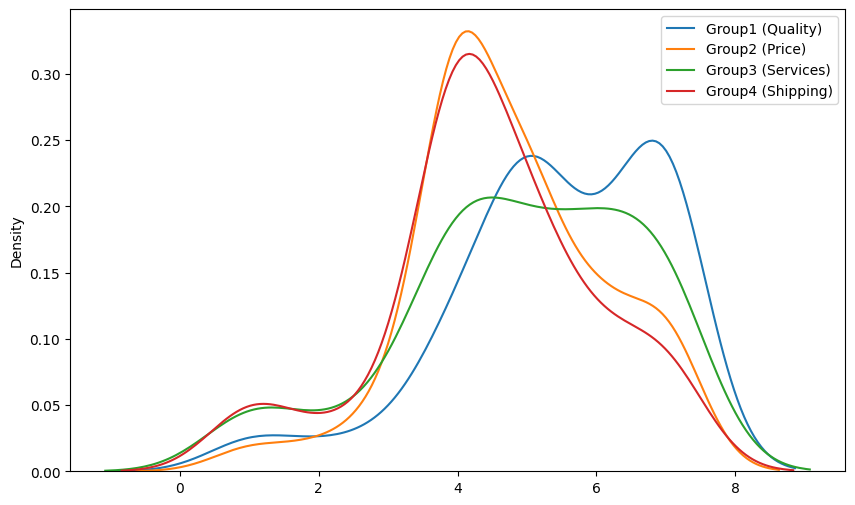

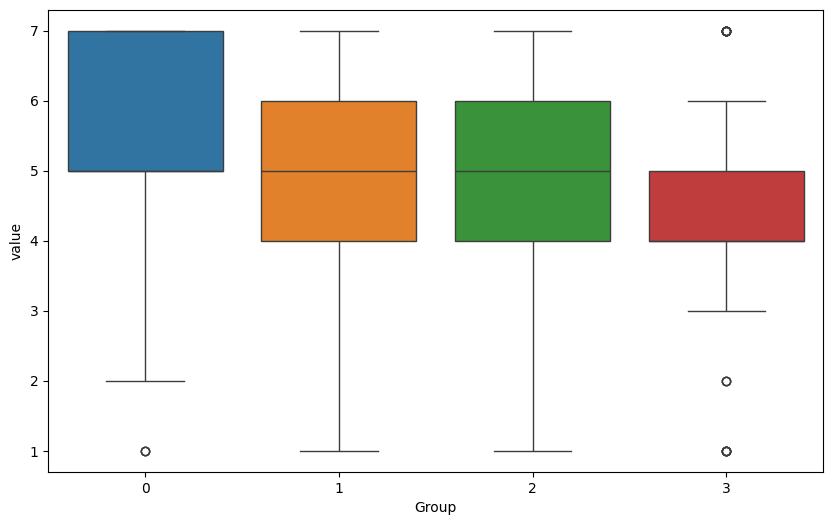

In [19]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/work/data.csv', encoding='euc-kr')
df1 = df['품질'].to_numpy()
df2 = df['가격'].to_numpy()
df3 = df['서비스'].to_numpy()
df4 = df['배송'].to_numpy()
Fstatistics, pvalue=stats.f_oneway(df1, df2, df3,)
print('F-통계량 값: ', end=''); print(Fstatistics)
print('pvalue(유의확률): ', end=''); print(pvalue)
plt.rcParams['figure.figsize'] = (10, 6)
sns.kdeplot(df1, label='Group1 (Quality)')
sns.kdeplot(df2, label='Group2 (Price)')
sns.kdeplot(df3, label='Group3 (Services)')
sns.kdeplot(df4, label='Group4 (Shipping)')
plt.legend(); plt.show()
sns.boxplot(data=[df1, df2, df3, df4])
plt.xlabel('Group')
plt.ylabel('value'); plt.show()

- x= df[['hp', 'wt','am']]: 독립변수
- y = df['mpg']: 종속변수
- fit = ols('y~x', data=df).fit(): 다중 선형회귀 분석 모형
- fit.summary(): 다중 선형회귀 분석 모형 적합 결과 요약
- fit.tvalues: 항목별 t-검정통계량
- round(fit.params[1],3): hp(항목)의 계수

In [20]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from statsmodels.formula.api import ols
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/work/mtcars.csv', encoding='euc-kr', index_col=0)
print(df.head())
x = df[['hp', 'wt', 'am']]
y = df['mpg']
fit = ols('y ~ x', data=df).fit()
print(fit.summary())
print('T-검정통계량: ', end=''); print(fit.tvalues)
print('p-value: ', end=''); print(fit.pvalues)
print('hp/마력 항목에 대한 계수(Coefficient): ', end=''); print(round(fit.params[1], 3))
print('am/트랜스미션 항목에 대한 p-value: ', end=''); print(round(fit.pvalues[3], 3))
print('@@@ 종속변수 값에 따른 실제값/연비 = 21.4 @@@')
print(df.iloc[3])
pred = fit.predict(exog=dict(x=[[110, 3.215, 0]]))
print('종속변수에 대한 예측값(mpg): ', end=''); print(pred[0])
relative_error = (df.iloc[3,0]-pred.values)/df.iloc[3,0]*100
print('실제값과 예측값 사이의 상대오차_절대값(%): ', end=''); print(abs(relative_error))
print('hp항목에 대한 95% 신뢰구간(하한): ', end=''); print(round(fit.conf_int(alpha=0.05)[0][1], 4))
print('hp항목에 대한 95% 신뢰구간(상한): ', end=''); print(round(fit.conf_int(alpha=0.05)[1][1], 4))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
model                                                                        
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
model                    
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2  
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:             

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/work/Titanic.csv')
print(df.head()); print(df.dtypes)

cont_table = pd.crosstab(df['Sex'], df['Survived'])
print(cont_table)
chi2, p, _, _ = chi2_contingency(cont_table)
print('*** Chi-square statistics *** {round(chi2,3)}', end='')
print(f"p-value: {p}")

X= df[['Sex', 'SibSp', 'Parch', 'Fare']]
X['Sex'] = X['Sex'].astype('category').cat.codes
X=sm.add_constant(X)
y = df['Survived']

model = sm.Logit(y, X)
result = model.fit()

coef_parch = result.params['Parch']
print(f"Coefficient for Parch: {coef_parch}")
print(f"### Coefficient for Parch ###: {round(coef_parch, 3)}")

coef_sibsp = result.params['SibSp']
print(f"Coefficient for SibSp: {coef_sibsp}")
odds = np.exp(coef_sibsp)
print(f"Odds Ratio for SibSp: {odds}")
print(f"+++ Odds Ratio for SibSp +++: {round(odds, 3)}")